<a href="https://colab.research.google.com/github/praneeetha1/Recipe-Analysis/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time to explore and visualise the data!!

In [13]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/ColabData'

recipes_df = pd.read_csv(f'{folder_path}/recipes_df.csv.gz', compression='gzip')
reviews_df = pd.read_csv(f'{folder_path}/reviews_df.csv.gz', compression='gzip')
combined_df = pd.read_csv(f'{folder_path}/combined_df.csv.gz', compression='gzip')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## What are the most common recipe categories?

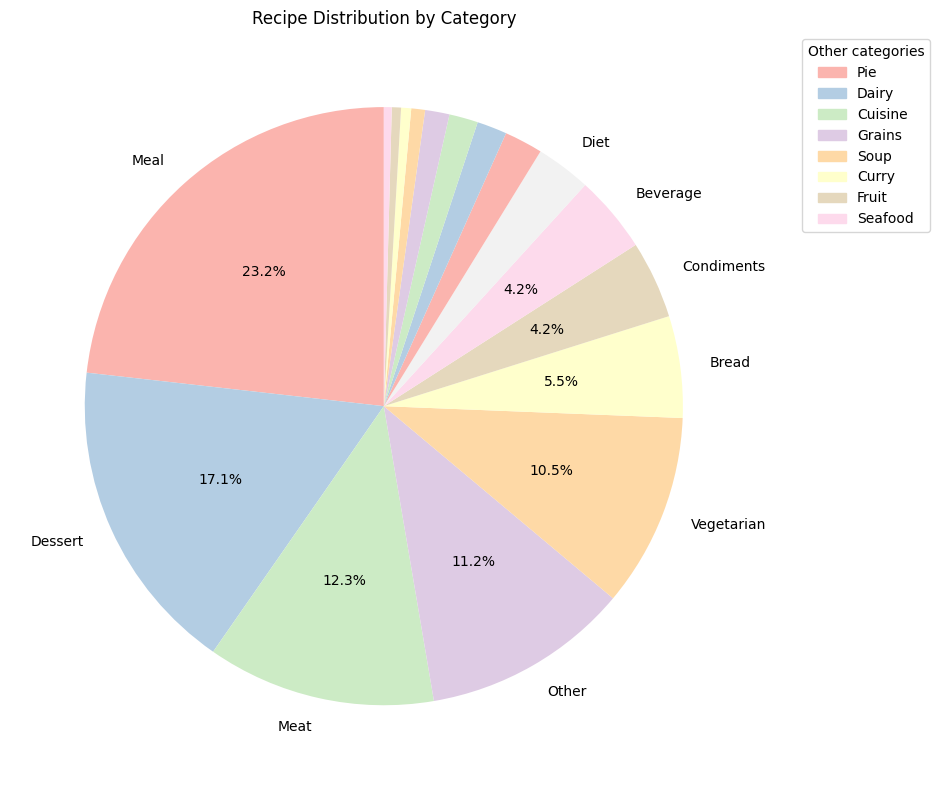

In [14]:
## distribution of recipes across different recipe categories
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(10,8))

counts = recipes_df['category_grouped'].value_counts()
num_hide = 8

labels_to_show = list(counts.index[:-num_hide]) + [''] * num_hide

def autopct_simple(pct, allvals):
    return f'{pct:.1f}%' if pct > 3 else ''

colors = plt.cm.Pastel1.colors
colors = colors * (len(counts) // len(colors) + 1)
colors = colors[:len(counts)]

counts.plot.pie(labels=labels_to_show,
                autopct=lambda pct: autopct_simple(pct, counts),
                startangle=90,
                colors=colors)

plt.ylabel('')
plt.title('Recipe Distribution by Category')

patches = [mpatches.Patch(color=colors[i]) for i in range(len(counts))]
hidden_labels = counts.index[-num_hide:]

plt.legend(handles=patches[-num_hide:], labels=hidden_labels.tolist(),
           title='Other categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


The top categories by recipe count are:
Meal (121,284), Dessert (89,446), Meat (64,527), Other (58,598), Vegetarian (54,731), Bread (28,720), Condiments (21,944).

## Which category has the highest average calories?

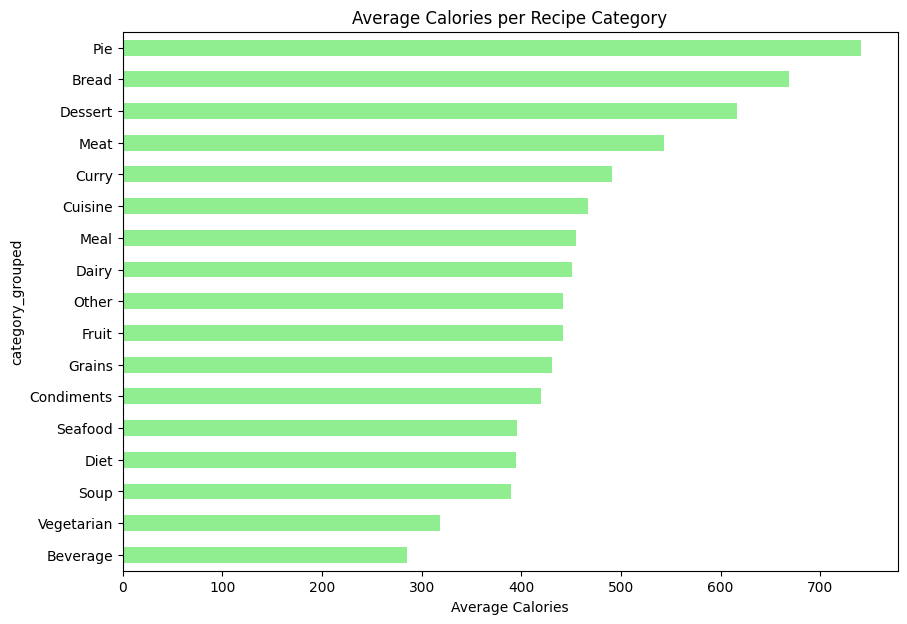

In [15]:
avg_calories_per_category = recipes_df.groupby('category_grouped')['calories'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,7))
avg_calories_per_category.plot(kind='barh', color='lightgreen')
plt.xlabel('Average Calories')
plt.title('Average Calories per Recipe Category')
plt.gca().invert_yaxis()
plt.show()

In [16]:
avg_calories_per_category

,calories
category_grouped,
Pie,740.498717
Bread,668.628795
Dessert,616.893460
Meat,543.424985
Curry,491.051887
Cuisine,466.768495
Meal,455.184609
Dairy,450.669525
Other,442.120521


Pie has the highest average calories (\~740.5), followed by Bread (\~668.6), Dessert (\~616.9), Meat (\~543.4).

## Which recipes have the most ingredients?

In [17]:
recipes_df['ingredient_count'] = recipes_df['ingredient_name'].apply(len)

recipes_with_most_ingredients = recipes_df.sort_values(by='ingredient_count', ascending=False)

print("Recipes with the most ingredients:")
display(recipes_with_most_ingredients[['name', 'ingredient_count', 'ingredient_name']].head(10))


Recipes with the most ingredients:


,name,ingredient_count,ingredient_name
470414,My Big Fat Greek Meat &amp; Pasta Casserole,808,"['extra virgin olive oil', 'lean ground beef',..."
487780,12-Minute Gourmet Gravy,752,"['unsalted butter', 'all-purpose flour', 'beef..."
470838,My Big Fat Greek Eggplant Casserole,730,"['eggplants', 'garlic cloves', 'fresh ground b..."
397045,Mamma Mia! Fresh Italian Lasagne!,721,"['olive oil', 'onion', 'fresh mushrooms', 'fre..."
376017,Quick &amp; Easy Pork Sausage,689,"['ground pork', 'fennel seed', 'ground sage', ..."
253312,Pan-Grilled Marinated Tofu With Two Variations,665,"['firm tofu', 'shiitake mushrooms', 'extra vir..."
513889,Parrillada Argentina With Red and Green Chimic...,656,"['oregano leaves', 'ground cumin', 'paprika', ..."
384091,6 Differents Dry Rubs,647,"['chili powder', 'garlic powder', 'dried orega..."
481782,Sixteen-Spice-Rubbed Chicken Breast With Black...,636,"['green onion', 'red wine vinegar', 'honey', '..."
184143,"Chocolate Raspberry Mousse Truffle Cake, Rasp...",629,"['cake flour', 'baking soda', 'salt', 'unsalte..."


“My Big Fat Greek Meat & Pasta Casserole” has 808 ingredients making it the recipe with the most ingredients out of all the recipes

## Top reviewers by number of reviews

In [18]:
top_reviewers = combined_df['author_name_review'].value_counts().head(10)
display(top_reviewers)

,count
author_name_review,
Sydney Mike,8842
Sharon123,6605
Boomette,5438
Baby Kato,4693
Annacia,4586
Kittencalrecipezazz,3963
Rita1652,3743
Parsley,3688
PaulaG,3590


## Review accumulation over time

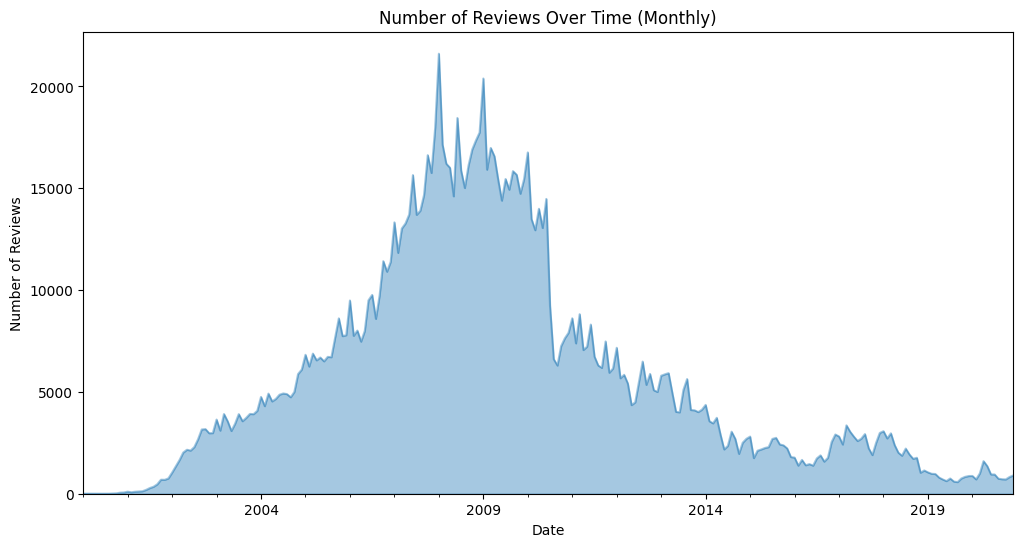

In [19]:
combined_df['date_submitted'] = pd.to_datetime(combined_df['date_submitted'])
reviews_over_time = combined_df.set_index('date_submitted').resample('ME')['review_id'].count()

plt.figure(figsize=(12,6))
reviews_over_time.plot.area(alpha=0.4)
plt.title('Number of Reviews Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

Number of reviews submitted peaked around 2008 and 2009 and decreased through the years

## Is there a relationship between cook time and average rating?

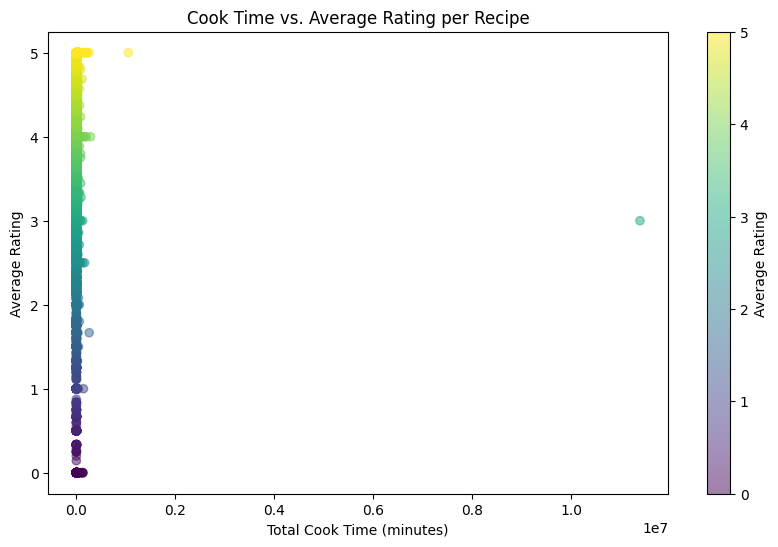

In [20]:
avg_rating_per_recipe = combined_df.groupby('recipe_id')['rating'].mean()
cook_time = recipes_df.set_index('recipe_id')['total_time_min']

scatter_data = pd.concat([cook_time, avg_rating_per_recipe], axis=1).dropna()

plt.figure(figsize=(10,6))
plt.scatter(scatter_data['total_time_min'], scatter_data['rating'], alpha=0.5, c=scatter_data['rating'], cmap='viridis')
plt.colorbar(label='Average Rating')
plt.xlabel('Total Cook Time (minutes)')
plt.ylabel('Average Rating')
plt.title('Cook Time vs. Average Rating per Recipe')
plt.show()

based on the scatter plot, there does not appear to be a strong or clear relationship between total cook time and average rating per recipe

## Who are the top recipe authors by count?

In [21]:
top_recipe_authors = recipes_df['author_name'].value_counts().head(10)

print("Top 10 Recipe Authors by Recipe Count:")
display(top_recipe_authors)


Top 10 Recipe Authors by Recipe Count:


,count
author_name,
ratherbeswimmin,7742
dicentra,6375
Kittencalrecipezazz,3926
internetnut,3435
Chef mariajane,3399
Sharon123,3301
Dancer,3032
gailanng,2841
English_Rose,2260


## Which authors have the highest average rating (min 10 recipes)?

In [22]:
author_rating_summary = recipes_df.groupby('author_name').agg(
    avg_rating=('aggregate_rating', 'mean'),
    recipe_count=('recipe_id', 'count')
)

min_recipes_threshold = 10
consistent_authors = author_rating_summary[author_rating_summary['recipe_count'] >= min_recipes_threshold]


In [23]:
top_consistent_authors = consistent_authors.sort_values(by='avg_rating', ascending=False).head(10)
print(f"Top 10 Recipe Authors with Highest Average Ratings (minimum {min_recipes_threshold} recipes):")
display(top_consistent_authors)

Top 10 Recipe Authors with Highest Average Ratings (minimum 10 recipes):


,avg_rating,recipe_count
author_name,,
A Taste of Brooklyn,5.0,18
Mimi Hall,5.0,15
MinnMomof2,5.0,17
AZ Food Critic,5.0,24
waynemiller,5.0,19
596151,5.0,13
Miss Candiquik,5.0,16
352lillian,5.0,10
Chef Reg Jones,5.0,15


## What are the average cook and prep times by category?

In [28]:
recipes_df.head()

,recipe_id,name,author_id,author_name,category,description,image_url,ingredient_qty,ingredient_name,servings,...,review_count,calories,cook_time_min,prep_time_min,total_time_min,cook_time,prep_time,total_time,category_grouped,ingredient_count
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,Frozen Desserts,Make and share this Low-Fat Berry Blue Frozen ...,https://img.sndimg.com/food/image/upload/w_555...,"['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.0,...,4.0,170.9,1440,45,1485,24 hr,45.0 min,24 hr 45.0 min,Dessert,68
1,39,Biryani,1567,elly9812,Chicken Breast,Make and share this Biryani recipe from Food.com.,https://img.sndimg.com/food/image/upload/w_555...,"['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",6.0,...,1.0,1110.7,25,240,265,25.0 min,4 hr,4 hr 25.0 min,Meat,327
2,40,Best Lemonade,1566,Stephen Little,Beverages,This is from one of my first Good House Keepi...,https://img.sndimg.com/food/image/upload/w_555...,"['1 1/2', '1', 'NA', '1 1/2', 'NA', '3/4']","['sugar', 'lemons', 'rind of', 'lemon', 'zest ...",4.0,...,10.0,311.1,5,30,35,5.0 min,30.0 min,35.0 min,Beverage,86
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,Soy/Tofu,This dish is best prepared a day in advance to...,https://img.sndimg.com/food/image/upload/w_555...,"['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",2.0,...,2.0,536.1,20,1440,1460,20.0 min,24 hr,24 hr 20.0 min,Other,216
4,42,Cabbage Soup,1538,Duckie067,Vegetable,Make and share this Cabbage Soup recipe from F...,https://img.sndimg.com/food/image/upload/w_555...,"['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.0,...,11.0,103.6,30,20,50,30.0 min,20.0 min,50.0 min,Vegetarian,63


In [25]:
def format_minutes(minutes):
    if pd.isnull(minutes) or minutes == 0:
        return "0 min"
    hours = minutes // 60
    mins = minutes % 60
    if hours > 0 and mins > 0:
        return f"{hours} hr {mins:.1f} min"
    elif hours > 0:
        return f"{hours} hr"
    else:
        return f"{mins:.1f} min"

average_times_by_category = recipes_df.groupby('category_grouped')[['cook_time_min', 'prep_time_min', 'total_time_min']].mean()

average_times_by_category_sorted = average_times_by_category.sort_values(by='total_time_min', ascending=False)


average_times_by_category_formatted = average_times_by_category_sorted.applymap(format_minutes)
display(average_times_by_category_formatted)


/tmp/ipython-input-3821063373.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  average_times_by_category_formatted = average_times_by_category_sorted.applymap(format_minutes)


,cook_time_min,prep_time_min,total_time_min
category_grouped,,,
Beverage,40.0 hr 56.9 min,2.0 hr 29.3 min,43.0 hr 26.1 min
Diet,2.0 hr 19.6 min,3.0 hr 27.7 min,5.0 hr 47.4 min
Meat,4.0 hr 26.0 min,58.6 min,5.0 hr 24.8 min
Other,2.0 hr 4.4 min,1.0 hr 39.9 min,3.0 hr 44.4 min
Fruit,2.0 hr 8.6 min,48.5 min,2.0 hr 57.5 min
Cuisine,1.0 hr 27.4 min,53.8 min,2.0 hr 21.4 min
Vegetarian,1.0 hr 28.7 min,38.8 min,2.0 hr 7.6 min
Soup,1.0 hr 19.4 min,47.5 min,2.0 hr 6.9 min
Bread,51.5 min,1.0 hr 5.3 min,1.0 hr 56.8 min


In [40]:
beverage_recipes = recipes_df[recipes_df['category_grouped'] == 'Beverage']
top_beverage = beverage_recipes.sort_values(by='total_time_min', ascending=False).iloc[0]

print("Beverage recipe with highest total time:")
display(top_beverage[['name', 'total_time', 'cook_time', 'prep_time']].head(1))

top_recipe_id = top_beverage['recipe_id']
# print("Recipe id of the beverage with the longest total time: ", top_recipe_id)

Beverage recipe with highest total time:


,46086
name,Caroline Cogswell's Celebrated Morning Tonic (...


Recipe id of the beverage with the longest total time:  50088


In [71]:
recipe_reviews = combined_df[combined_df['recipe_id'] == top_recipe_id]
recipe_reviews

,review_id,recipe_id,author_id_review,author_name_review,rating,review,date_submitted,name,author_id_recipe,author_name_recipe,...,aggregate_rating,review_count,calories,cook_time_min,prep_time_min,total_time_min,cook_time,prep_time,total_time,category_grouped


No reviews are found for this recipe

In [69]:
## lets look at the instructions of the recipe

import ast

instructions_str = recipe_reviews['instructions'].iloc[0]
instructions = ast.literal_eval(instructions_str) if isinstance(instructions_str, str) else instructions_str

for i, step in enumerate(instructions, 1):
    print(f"{i}. {step}")

1. Make simple syrup by heating sugar and water in a heavy saucepan
2. stirring to mix. Bring to a boil
3. reduce heat and simmer until sugar is dissolved
4. about 3 minutes.
5. Add instant coffee and spices and remove from heat. Cool.
6. Add rum and brandy and pour into a glass or ceramic container (not metal or plastic). Cap tightly or cover tightly with plastic wrap.
7. If you're multiplying the recipe
8. you will still want to steep it in containers no bigger than about a quart
9. dividing the spices up between them. The flavor doesn't seem to develop as well in bigger containers. I've bought a box of quart canning jars that I re-use every year.
10. Steep for three weeks in a cool
11. dark place
12. shaking or swirling around in the container every two or three days.
13. Strain out the spices and discard.
14. Line a funnel
15. a sieve or a coffee cone with a dampened coffee filter and pour the liqueur through. Change the filter regularly. This is a SLOW process!
16. When I make thi

## Most commonly used ingredients overall

Most commonly used ingredients:


,count
salt,199779
butter,136079
sugar,115852
onion,87546
water,84376


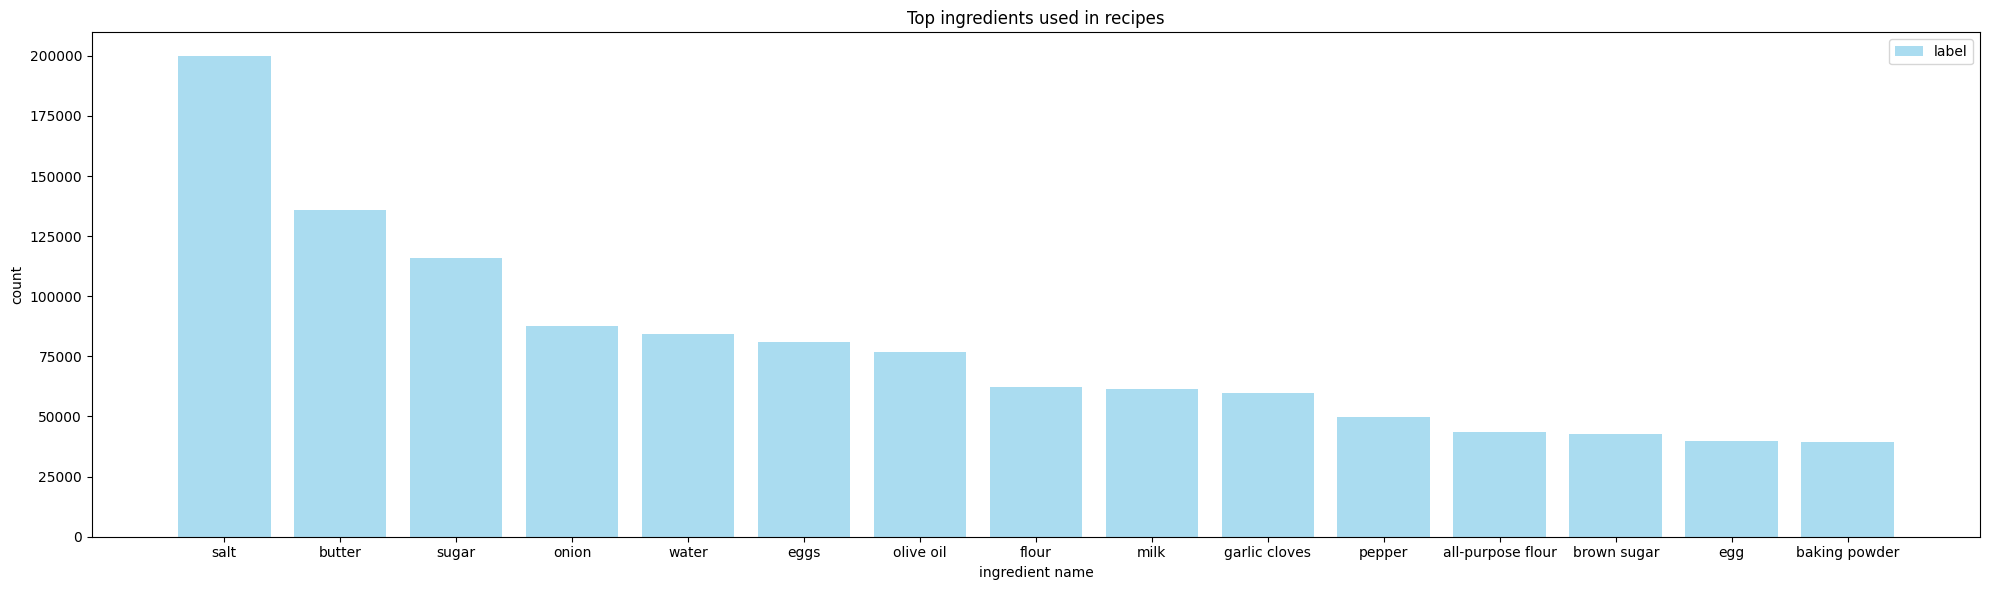

In [73]:
all_ingredients = []

for ingredient_list in recipes_df['ingredient_name'].dropna():
    ingredients = [i.strip().lower() for i in ingredient_list]
    all_ingredients.extend(ingredients)

ing_count = pd.Series(all_ingredients).value_counts()

print("Most commonly used ingredients:")
display(ing_count.head(5))

plt.figure(figsize=(20,6))

x = ing_count.head(15).index
y = ing_count.head(15).values

plt.bar(x, y, color='skyblue', alpha=0.7, label='label')
plt.xlabel('ingredient name')
plt.ylabel('count')
plt.title('Top ingredients used in recipes')
plt.legend()
plt.tight_layout()
plt.show()


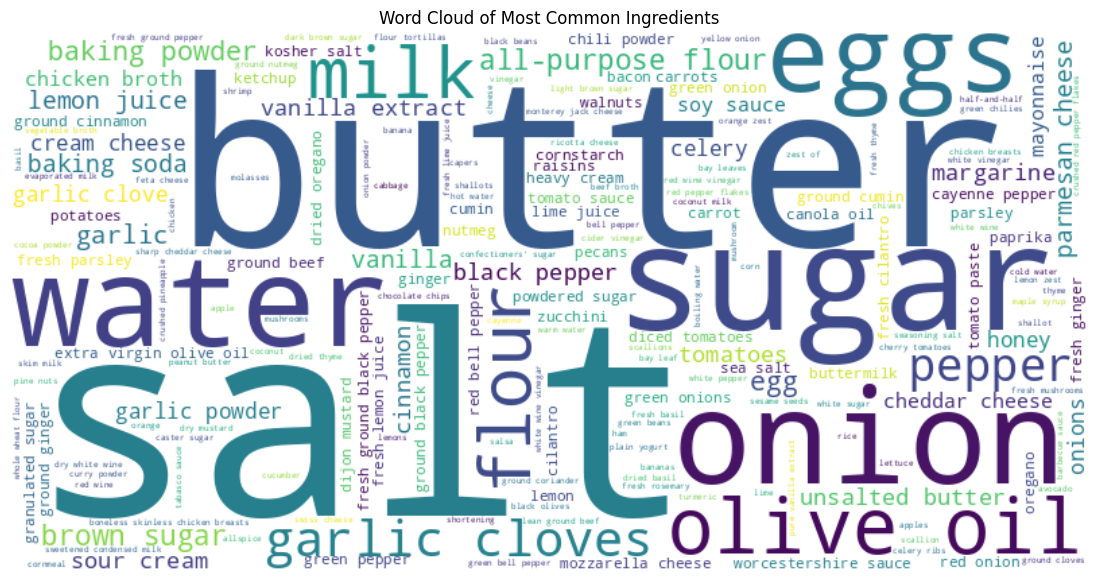

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud = wordcloud.generate_from_frequencies(ing_count.to_dict())

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Ingredients')
plt.show()